**Prepared by**

**Asif Newaz**

**Lecturer, EEE, IUT**


**ML Pipeline**


*   Large dataset (e.g. Image data) - train test split
*   Small dataset (structured data) - cross validation (CV)

=> depending on dataset size and other issues like imbalance ratio, you may use different CV schemes (discussed in class)




**Importing libraries + data**

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import *
from imblearn.metrics import *
from sklearn.impute import *

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data= pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
y=data['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [5]:
x= data.drop(['Outcome'],axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


**Preprocessing**

* Check imbalance ratio

In [ ]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

* Check missing entries

In [ ]:
x.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

* Check feature importance (e.g. correlation)

In [ ]:
co= data.corr()
co

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

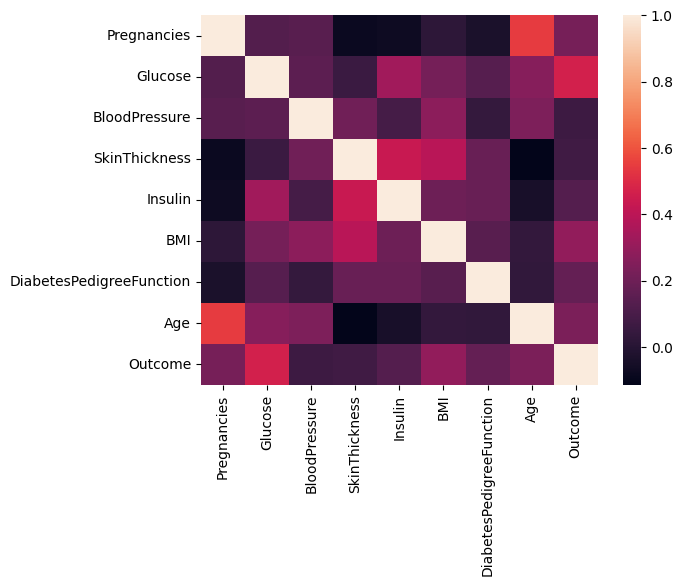

In [ ]:
sns.heatmap(co)

**Training Classifiers**

* Small dataset -> cross-validation
* small imbalance -> stratified cv
* number of minority class instances - good -> 10 fold
* metrics - slighly imbalanced data -> accuracy, gmean, sensitivity, specificity, precision, roc-auc, mcc

In [6]:
from sklearn.pipeline import Pipeline

Put all steps inside the pipeline - it'll divide the data internally into training and testing folds; perform scaling, sampling, etc. only on the training set and measure performance on the test set.

In [13]:
knn= KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
lr = LogisticRegression()
dt= DecisionTreeClassifier(random_state=10)
svc = SVC(random_state=10)
nb = GaussianNB()

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

In [7]:
sk = StratifiedKFold(shuffle = True, random_state = 100, n_splits= 10)

In [8]:
scores={'accuracy': make_scorer(accuracy_score),
        'recall' : make_scorer(recall_score),
        'specificity':make_scorer(recall_score,pos_label=0),
        'gmean': make_scorer(geometric_mean_score),
        'roc': make_scorer(roc_auc_score),
        'mcc': make_scorer(matthews_corrcoef)
        }

Use cross_validate for validation when u want multiple performance measures.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html



In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('lr', lr)])

result= cross_validate(pipe, x,y, cv = sk, n_jobs= -1, scoring = scores)

df= pd.DataFrame(result)
df

,fit_time,score_time,test_accuracy,test_recall,test_specificity,test_gmean,test_roc,test_mcc
0,0.014325,0.019919,0.727273,0.518519,0.84,0.659966,0.679259,0.378692
1,0.012520,0.015111,0.727273,0.481481,0.86,0.643486,0.670741,0.371605
2,0.011121,0.013187,0.779221,0.518519,0.92,0.690679,0.719259,0.494416
3,0.011835,0.015848,0.675325,0.481481,0.78,0.612826,0.630741,0.269379
4,0.015602,0.016734,0.779221,0.481481,0.94,0.672750,0.710741,0.495702
5,0.012800,0.017436,0.870130,0.703704,0.96,0.821922,0.831852,0.711111
6,0.016132,0.019961,0.818182,0.629630,0.92,0.761091,0.774815,0.588889
7,0.013797,0.018551,0.792208,0.629630,0.88,0.744362,0.754815,0.531326
8,0.012852,0.017090,0.736842,0.538462,0.84,0.672538,0.689231,0.395900
9,0.012295,0.016369,0.815789,0.692308,0.88,0.780532,0.786154,0.584109


In [ ]:
df.mean(axis=0)

fit_time            0.013328
score_time          0.017021
test_accuracy       0.772146
test_recall         0.567521
test_specificity    0.882000
test_gmean          0.706015
test_roc            0.724761
test_mcc            0.482113
dtype: float64

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('svm', svc)])

result= cross_validate(pipe, x,y, cv = sk, n_jobs= -1, scoring = scores)

df= pd.DataFrame(result)
df.mean(axis=0)

fit_time            0.031602
score_time          0.019252
test_accuracy       0.766951
test_recall         0.556553
test_specificity    0.880000
test_gmean          0.698273
test_roc            0.718276
test_mcc            0.468768
dtype: float64

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('nb', nb)])

result= cross_validate(pipe, x,y, cv = sk, n_jobs= -1, scoring = scores)

df= pd.DataFrame(result)
df.mean(axis=0)

fit_time            0.018640
score_time          0.035803
test_accuracy       0.760458
test_recall         0.604701
test_specificity    0.844000
test_gmean          0.711777
test_roc            0.724350
test_mcc            0.463964
dtype: float64

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('dt', dt)])

result= cross_validate(pipe, x,y, cv = sk, n_jobs= -1, scoring = scores)

df= pd.DataFrame(result)
df.mean(axis=0)

fit_time            0.040949
score_time          0.050072
test_accuracy       0.716165
test_recall         0.620228
test_specificity    0.768000
test_gmean          0.685089
test_roc            0.694114
test_mcc            0.386402
dtype: float64

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('knn', knn)])

result= cross_validate(pipe, x,y, cv = sk, n_jobs= -1, scoring = scores)

df= pd.DataFrame(result)
df.mean(axis=0)

fit_time            0.008612
score_time          0.036818
test_accuracy       0.750000
test_recall         0.556410
test_specificity    0.854000
test_gmean          0.686028
test_roc            0.705205
test_mcc            0.431955
dtype: float64

**Cost-sensitive learning**

One way to deal with class imbalance scenario. Although the data has a small imbalance, you can still see how to perform this operation.

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

look at the documentation for the SVM classifier. There is a parameter termed 'class_weight'.

In [9]:
svc_cost = SVC(class_weight='balanced', random_state=10)

In [18]:
pipe = Pipeline([('scaler', StandardScaler()), ('svm', svc_cost)])

result= cross_validate(pipe, x,y, cv = sk, n_jobs= -1, scoring = scores)

df= pd.DataFrame(result)
df.mean(axis=0)

fit_time            0.023293
score_time          0.011615
test_accuracy       0.738209
test_recall         0.735328
test_specificity    0.740000
test_gmean          0.735931
test_roc            0.737664
test_mcc            0.461397
dtype: float64

In [21]:
# see the error message to understand how to debug when you get stuck
svc_cost_25 = SVC(class_weight=2.5, random_state=10)

pipe = Pipeline([('scaler', StandardScaler()), ('svm', svc_cost_25)])

result= cross_validate(pipe, x,y, cv = sk, n_jobs= -1, scoring = scores)

dff= pd.DataFrame(result)
dff.mean(axis=0)

ValueError: ignored

In [22]:
svc_cost_25 = SVC(class_weight={1:2.5,0:1}, random_state=10)

pipe = Pipeline([('scaler', StandardScaler()), ('svm', svc_cost_25)])

result= cross_validate(pipe, x,y, cv = sk, n_jobs= -1, scoring = scores)

dff= pd.DataFrame(result)
dff.mean(axis=0)

fit_time            0.024752
score_time          0.013447
test_accuracy       0.730417
test_recall         0.806410
test_specificity    0.690000
test_gmean          0.743997
test_roc            0.748205
test_mcc            0.476556
dtype: float64

In [19]:
pipe = Pipeline([('scaler', StandardScaler()), ('svm', svc)])

result= cross_validate(pipe, x,y, cv = sk, n_jobs= -1, scoring = scores)

df2= pd.DataFrame(result)
df2.mean(axis=0)

fit_time            0.020644
score_time          0.011906
test_accuracy       0.766951
test_recall         0.556553
test_specificity    0.880000
test_gmean          0.698273
test_roc            0.718276
test_mcc            0.468768
dtype: float64

Compare with the no-cost added scenario.

In [23]:
imb= pd.DataFrame()
imb['svm_cost']= df.mean(axis=0)
imb['svm_cost_2.5']= dff.mean(axis=0)
imb['svm']= df2.mean(axis=0)
imb

,svm_cost,svm_cost_2.5,svm
fit_time,0.023293,0.024752,0.020644
score_time,0.011615,0.013447,0.011906
test_accuracy,0.738209,0.730417,0.766951
test_recall,0.735328,0.806410,0.556553
test_specificity,0.740000,0.690000,0.880000
test_gmean,0.735931,0.743997,0.698273
test_roc,0.737664,0.748205,0.718276
test_mcc,0.461397,0.476556,0.468768


**Hyperparameter Tuning**

You may want to try out different values of weights and see which one is giving you better results.

Similarly, you may also want to try different possible values for other parameters as well.

This process is called hyperparameter tuning.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [24]:
# define the different values for different paramters inside a dictionary.
# the more values you try, the more times the model will train -> more time it will take

para = {'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
        'C':[0.5, 1, 1.5, 2]}

In [25]:
grid= GridSearchCV(estimator = svc, param_grid= para, scoring = make_scorer(roc_auc_score), n_jobs=-1, cv=sk)

In [26]:
grid.fit(x,y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=100, shuffle=True),
             estimator=SVC(random_state=10), n_jobs=-1,
             param_grid={'C': [0.5, 1, 1.5, 2],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             scoring=make_scorer(roc_auc_score))

In [27]:
result= pd.DataFrame(grid.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019390,0.001368,0.005032,0.000443,0.5,rbf,"{'C': 0.5, 'kernel': 'rbf'}",0.606667,0.737778,0.653704,0.549630,0.693704,0.739259,0.709259,0.673704,0.660000,0.767692,0.679140,0.062515,12
1,2.905832,1.079365,0.003547,0.000096,0.5,linear,"{'C': 0.5, 'kernel': 'linear'}",0.670741,0.670741,0.719259,0.620741,0.729259,0.813333,0.754815,0.736296,0.679231,0.786154,0.718057,0.055661,4
2,0.021977,0.003424,0.003683,0.000354,0.5,poly,"{'C': 0.5, 'kernel': 'poly'}",0.606667,0.700741,0.672222,0.568148,0.693704,0.730741,0.757778,0.702222,0.651538,0.748462,0.683222,0.057514,11
3,0.028364,0.000268,0.005207,0.000275,0.5,sigmoid,"{'C': 0.5, 'kernel': 'sigmoid'}",0.437037,0.395556,0.387037,0.424074,0.428519,0.427037,0.434074,0.380000,0.437692,0.457692,0.420872,0.023743,13
4,0.018089,0.000579,0.005095,0.001522,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.652222,0.737778,0.673704,0.549630,0.693704,0.757778,0.709259,0.720741,0.660000,0.796154,0.695097,0.064429,7
5,5.423662,1.768052,0.004090,0.001284,1,linear,"{'C': 1, 'kernel': 'linear'}",0.670741,0.670741,0.719259,0.620741,0.729259,0.813333,0.763333,0.736296,0.679231,0.786154,0.718909,0.056278,2
6,0.030337,0.010803,0.005488,0.003520,1,poly,"{'C': 1, 'kernel': 'poly'}",0.625185,0.700741,0.672222,0.549630,0.712222,0.712222,0.757778,0.683704,0.690000,0.767692,0.687140,0.059926,10
7,0.026956,0.000383,0.005371,0.000691,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.427037,0.385556,0.377037,0.422593,0.397037,0.387037,0.404074,0.397037,0.417692,0.437692,0.405279,0.019065,14
8,0.018601,0.002065,0.004733,0.000082,1.5,rbf,"{'C': 1.5, 'kernel': 'rbf'}",0.633704,0.737778,0.673704,0.549630,0.693704,0.794815,0.699259,0.710741,0.670000,0.796154,0.695949,0.069464,6
9,9.163140,4.484278,0.004088,0.001532,1.5,linear,"{'C': 1.5, 'kernel': 'linear'}",0.670741,0.670741,0.719259,0.620741,0.729259,0.813333,0.763333,0.736296,0.679231,0.786154,0.718909,0.056278,2


In [28]:
result.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
13,10.810122,4.560892,0.003492,0.000299,2,linear,"{'C': 2, 'kernel': 'linear'}",0.670741,0.689259,0.719259,0.620741,0.729259,0.813333,0.763333,0.736296,0.679231,0.786154,0.720761,0.054952,1
5,5.423662,1.768052,0.004090,0.001284,1,linear,"{'C': 1, 'kernel': 'linear'}",0.670741,0.670741,0.719259,0.620741,0.729259,0.813333,0.763333,0.736296,0.679231,0.786154,0.718909,0.056278,2
9,9.163140,4.484278,0.004088,0.001532,1.5,linear,"{'C': 1.5, 'kernel': 'linear'}",0.670741,0.670741,0.719259,0.620741,0.729259,0.813333,0.763333,0.736296,0.679231,0.786154,0.718909,0.056278,2
1,2.905832,1.079365,0.003547,0.000096,0.5,linear,"{'C': 0.5, 'kernel': 'linear'}",0.670741,0.670741,0.719259,0.620741,0.729259,0.813333,0.754815,0.736296,0.679231,0.786154,0.718057,0.055661,4
12,0.017617,0.000506,0.004474,0.000490,2,rbf,"{'C': 2, 'kernel': 'rbf'}",0.670741,0.737778,0.653704,0.568148,0.693704,0.794815,0.689259,0.720741,0.670000,0.796154,0.699504,0.064444,5
8,0.018601,0.002065,0.004733,0.000082,1.5,rbf,"{'C': 1.5, 'kernel': 'rbf'}",0.633704,0.737778,0.673704,0.549630,0.693704,0.794815,0.699259,0.710741,0.670000,0.796154,0.695949,0.069464,6
4,0.018089,0.000579,0.005095,0.001522,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.652222,0.737778,0.673704,0.549630,0.693704,0.757778,0.709259,0.720741,0.660000,0.796154,0.695097,0.064429,7
14,0.043572,0.010124,0.003702,0.000280,2,poly,"{'C': 2, 'kernel': 'poly'}",0.615185,0.700741,0.653704,0.549630,0.712222,0.759259,0.757778,0.702222,0.690000,0.786923,0.692766,0.067886,8
10,0.034621,0.009910,0.003498,0.000197,1.5,poly,"{'C': 1.5, 'kernel': 'poly'}",0.615185,0.700741,0.682222,0.549630,0.712222,0.740741,0.739259,0.702222,0.690000,0.786923,0.691915,0.063623,9
6,0.030337,0.010803,0.005488,0.003520,1,poly,"{'C': 1, 'kernel': 'poly'}",0.625185,0.700741,0.672222,0.549630,0.712222,0.712222,0.757778,0.683704,0.690000,0.767692,0.687140,0.059926,10


**Feature Selection**

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

In [31]:
# Wrapper - RFECV
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=svc, step=1, cv=sk, scoring= make_scorer(roc_auc_score), n_jobs=-1)


In [32]:
# Fit the RFECV object to the data
rfecv.fit(x, y)

ValueError: ignored

In [33]:
svc_lin = SVC(random_state=10, kernel='linear')

In [35]:
rfecv = RFECV(estimator=svc_lin, step=1, cv=sk, scoring= make_scorer(roc_auc_score), n_jobs=-1)
rfecv.fit(x, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=100, shuffle=True),
      estimator=SVC(kernel='linear', random_state=10), n_jobs=-1,
      scoring=make_scorer(roc_auc_score))

In [36]:
best_features = x.columns[rfecv.support_]
# print the column names of the selected features
print(best_features)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


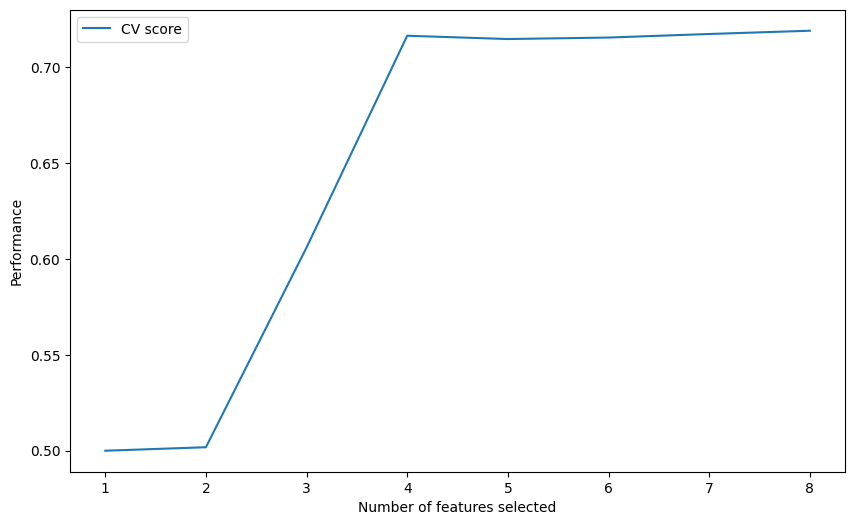

In [37]:
# Plot the number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Performance")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], label='CV score')
plt.legend(loc='best')
plt.show()

In [38]:
rfecv = RFECV(estimator=svc_lin, step=1, cv=sk, scoring= 'accuracy', n_jobs=-1)
rfecv.fit(x, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=100, shuffle=True),
      estimator=SVC(kernel='linear', random_state=10), n_jobs=-1,
      scoring='accuracy')

In [39]:
best_features = x.columns[rfecv.support_]
# print the column names of the selected features
print(best_features)

Index(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction'], dtype='object')


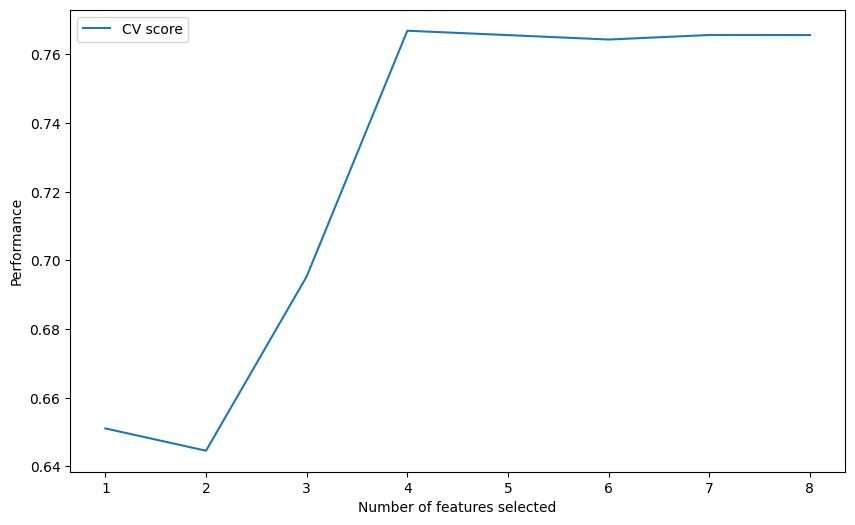

In [40]:
# Plot the number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Performance")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], label='CV score')
plt.legend(loc='best')
plt.show()